In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [5]:
df.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [7]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.groupby('Condition of the House')['ID'].count()

Condition of the House
Bad             30
Excellent     1701
Fair         14031
Good          5679
Okay           172
Name: ID, dtype: int64

In [9]:
values = (30,1701,14031,5679,172)
labels = ('Bad','Excellent','Fair','Good','Okay')

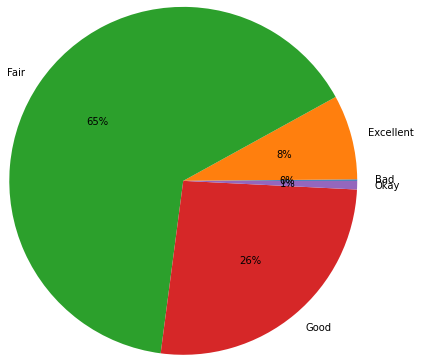

In [10]:
plt.pie(values,labels = labels,autopct='%1.0f%%',radius=2)
plt.show()

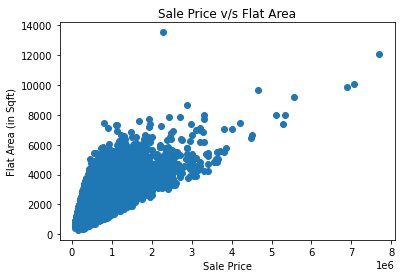

In [11]:
plt.scatter(x=df['Sale Price'],y=df["Flat Area (in Sqft)"])
plt.xlabel("Sale Price")
plt.ylabel("Flat Area (in Sqft)")
plt.title("Sale Price v/s Flat Area")
plt.show()

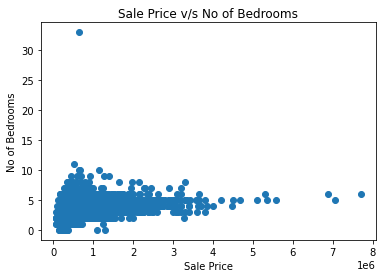

In [12]:
plt.scatter(x=df['Sale Price'],y=df["No of Bedrooms"])
plt.xlabel("Sale Price")
plt.ylabel("No of Bedrooms")
plt.title("Sale Price v/s No of Bedrooms")
plt.show()

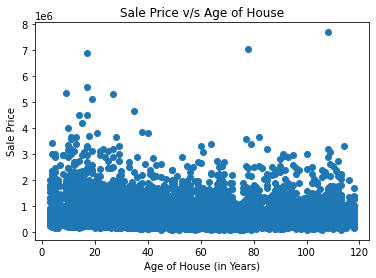

In [13]:
plt.scatter(y=df['Sale Price'],x=df["Age of House (in Years)"])
plt.ylabel("Sale Price")
plt.xlabel("Age of House (in Years)")
plt.title("Sale Price v/s Age of House")
plt.show()

(array([3592., 2663., 2784., 2525., 3218., 2587., 1361., 1079.,  952.,
         852.]),
 array([  3. ,  14.5,  26. ,  37.5,  49. ,  60.5,  72. ,  83.5,  95. ,
        106.5, 118. ]),
 <BarContainer object of 10 artists>)

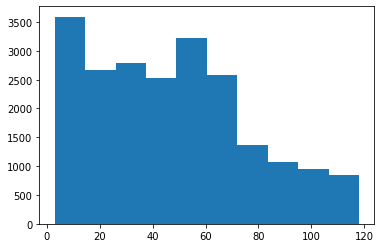

In [14]:
plt.hist(df["Age of House (in Years)"],bins=10)

In [15]:
zip_condition_sale = df.groupby(["Condition of the House","Zipcode"])["Sale Price"].mean()
zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [16]:
zip_condition_sale2 = pd.pivot_table(df,index=['Condition of the House','Zipcode'],values=['Sale Price'],aggfunc=np.mean)
zip_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [17]:
zip_condition_sale3 = pd.pivot_table(df,index=['Zipcode'],columns=['Condition of the House'],values=['Sale Price'],aggfunc=np.mean)
zip_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [18]:
def year(value):
    return value.split()[-1]
df['year_sold'] = df["Date House was Sold"].map(year)
df['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [19]:
def luxury_home(row):
    count = 0
    if row[0]=='Yes':
        count = count + 1
    if row[1] in ['Good','Excellent']:
        count = count + 1
    if row[2] >= 8:
        count = count + 1
    if count >= 2:
        return "Yes"
    else:
        return "No"

df["luxury_home"] = df[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home,axis=1)
df["luxury_home"].unique()

array(['No', 'Yes'], dtype=object)

## Outliers


In [20]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

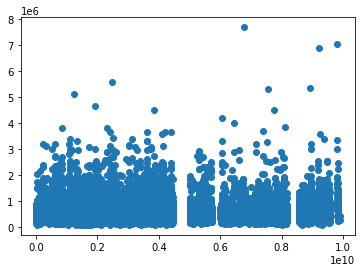

In [21]:
plt.scatter(x=df['ID'],y=df['Sale Price'])
plt.show()

<AxesSubplot:xlabel='Sale Price'>

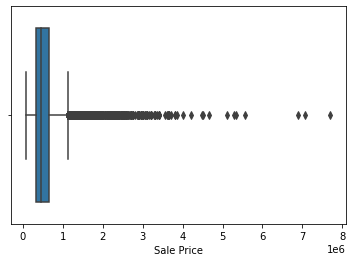

In [22]:
sns.boxplot(x=df['Sale Price'])

In [23]:
q1 = df['Sale Price'].quantile(.25)
q3 = df['Sale Price'].quantile(.75)
iqr = q3 - q1
iqr

323050.0

In [24]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [25]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [26]:
df['Sale Price'] = df['Sale Price'].apply(limit_imputer)

In [27]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

## Missing Values


In [28]:
df.dropna(inplace=True, axis=0, subset=['Sale Price'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <BarContainer object of 10 artists>)

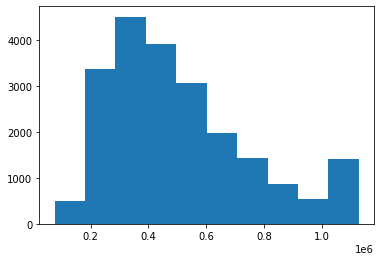

In [30]:
plt.hist(df["Sale Price"],bins=10)

In [31]:
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)'
                    ]

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [33]:
column = df['Zipcode'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
df['Zipcode'] = imputer.fit_transform(column)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [35]:
sum(df.isnull().sum())

0

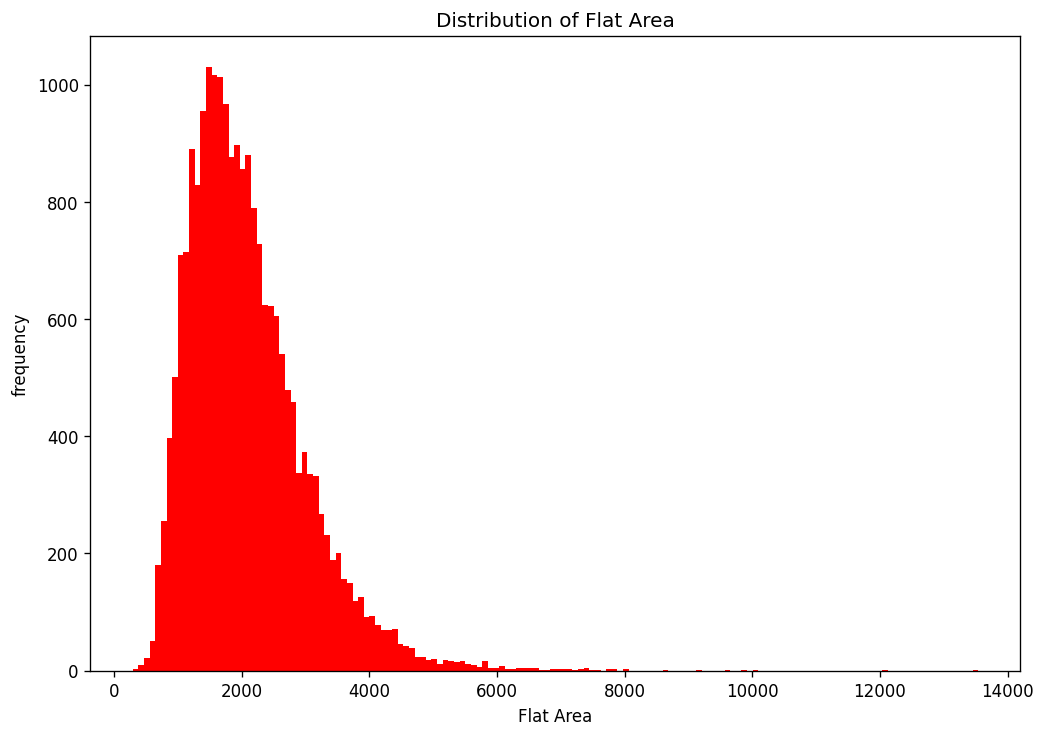

In [36]:
plt.figure(figsize = (10,7), dpi=120)
plt.hist(df['Flat Area (in Sqft)'], bins=150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [37]:
def log_transform(sample_data):
    return np.log(sample_data)

In [38]:
df['Transformed_Flat_Area'] = df['Flat Area (in Sqft)'].map(log_transform)

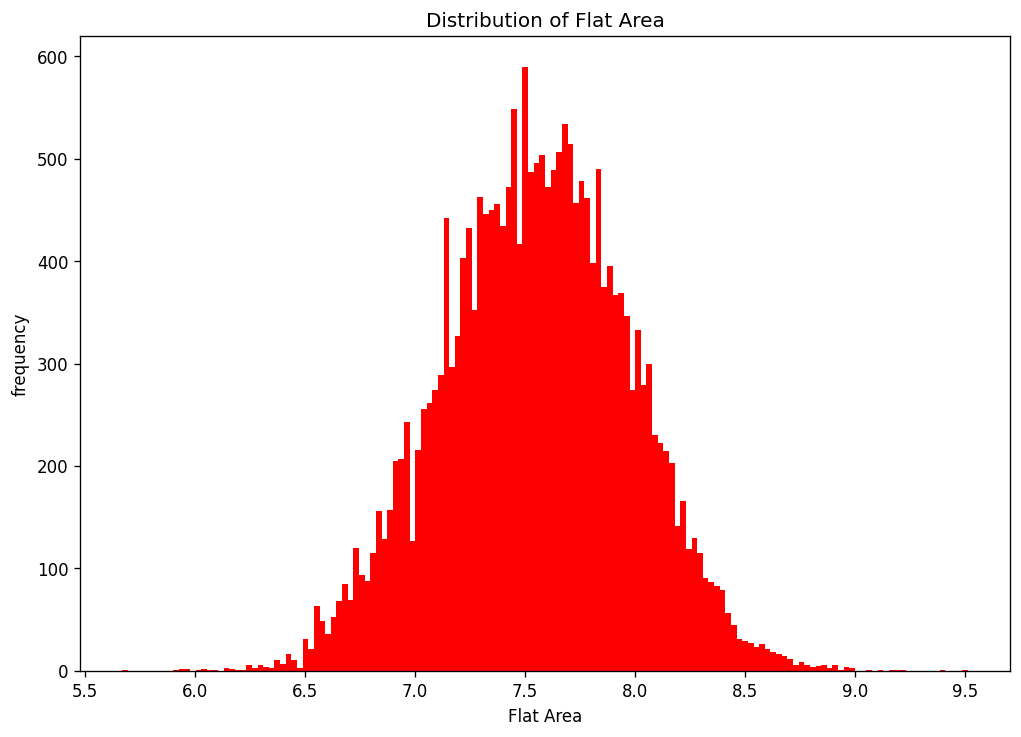

In [39]:
plt.figure(figsize = (10,7), dpi=120)
plt.hist(df['Transformed_Flat_Area'], bins=150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

## Variable Transformation


In [40]:
df['Zipcode'] = df['Zipcode'].astype(object)

In [41]:
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [42]:
mapping = {'None':0,'Once':1,'Twice':2,'Thrice':3,'Four':4}
df['No of Times Visited'] = df['No of Times Visited'].map(mapping)
df['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [43]:
df['Ever Renovated'] = np.where(df['Renovated Year'] == 0, 'No','Yes')

In [44]:
df['Purchase Year'] = pd.DatetimeIndex(df['Date House was Sold']).year

In [45]:
df['Year Since Renovation'] = np.where(df['Ever Renovated'] == 'Yes',
                abs(df['Purchase Year']-df['Renovated Year']), 0 )

In [46]:
df.drop(columns=['Purchase Year','Date House was Sold','Renovated Year',
                 'year_sold','luxury_home'],inplace=True)

## Correlation

In [47]:
df['Sale Price'].corr(df['Transformed_Flat_Area'])

0.6663229891839787

In [48]:
df['Sale Price'].corr(df['Flat Area (in Sqft)'])

0.6951704258420668

In [49]:
df = df.drop(columns='Transformed_Flat_Area')

In [50]:
df.drop(columns = ['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158


In [51]:
df.drop(columns = 'ID', inplace=True)

In [52]:
df['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

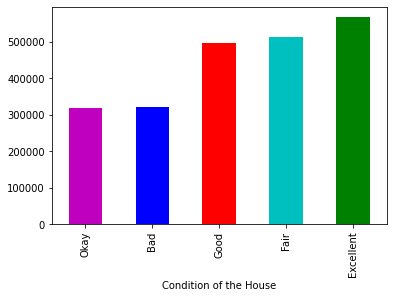

In [53]:
df.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar',color=list('mbrcg'))

In [54]:
df['Condition of the House'] = df['Condition of the House'].map({
    'Bad':1,'Okay':1,'Fair':2,'Good':2,'Excellent':3
})

<AxesSubplot:xlabel='Waterfront View'>

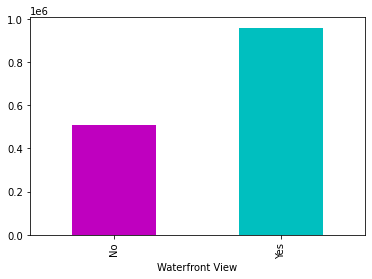

In [55]:
df.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar',color=list('mc'))

<AxesSubplot:xlabel='Ever Renovated'>

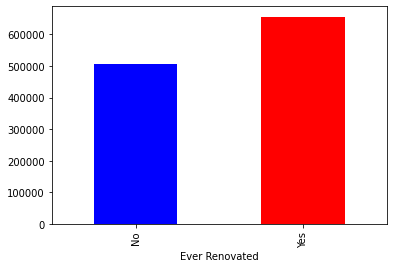

In [56]:
df.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar',color=list('br'))

<AxesSubplot:xlabel='Zipcode'>

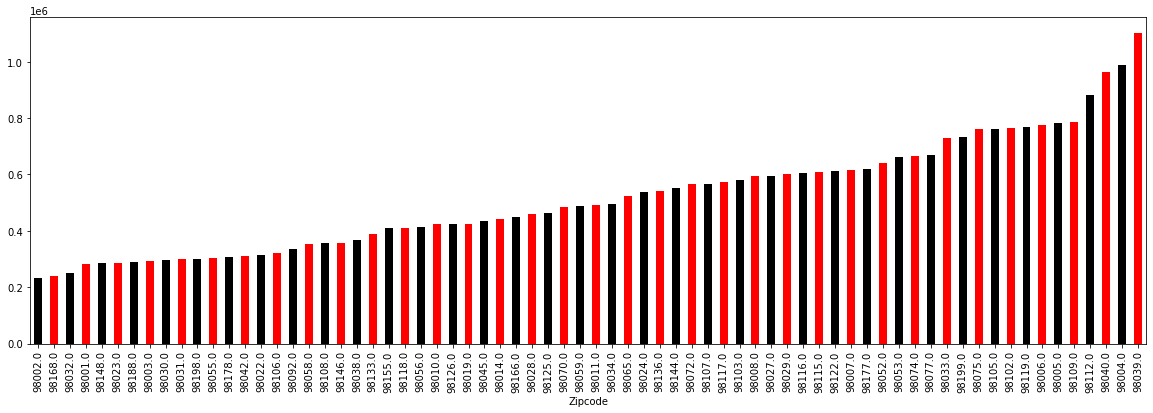

In [57]:
plt.figure(figsize=(20,6))
df.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind = 'bar',color=list('kr'))

In [58]:
df = df.rename(columns={'Sale Price':'Sale_Price',
                        'Condition of the House':'Condition_of_the_House',
                       'Ever Renovated':'Ever_Renovated',
                        'Waterfront View':'Waterfront_View'})

## Dummy variables

In [59]:
df = pd.get_dummies(df, columns=['Ever_Renovated','Waterfront_View'],drop_first = True)
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Ever_Renovated_Yes,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,26,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,3,7,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,0,0,0


In [60]:
Zip_Table = df.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending = True)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [61]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins=10,
                                   labels=['Zipcode_Group_0',
                                          'Zipcode_Group_1',
                                          'Zipcode_Group_2',
                                          'Zipcode_Group_3',
                                          'Zipcode_Group_4',
                                          'Zipcode_Group_5',
                                          'Zipcode_Group_6',
                                          'Zipcode_Group_7',
                                          'Zipcode_Group_8',
                                          'Zipcode_Group_9'],
                                   include_lowest = True)

In [62]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

In [63]:
df = pd.merge(df,Zip_Table,left_on = 'Zipcode',how='left',right_index=True)

In [64]:
df = df.drop(columns='Zipcode')

In [65]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,1,0,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,3,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,0,Zipcode_Group_4


In [66]:
df = pd.get_dummies(df,columns= ['Zipcode_Group'],drop_first=True)

## Train & Test

In [67]:
Y = df.iloc[:,0]

In [68]:
X = df.iloc[:,1:31]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [71]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15126, 27), (6483, 27), (15126,), (6483,))

## Feature Scaling - Standardisation

In [72]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [73]:
X_train = scale.fit_transform(X_train)

In [74]:
X_train

array([[-0.39221373, -1.44490243, -0.55215749, ..., -0.11428069,
        -0.16837455, -0.04815873],
       [-0.39221373, -0.47939296, -0.61720962, ..., -0.11428069,
        -0.16837455, -0.04815873],
       [ 0.66604971,  0.4861165 , -0.03174047, ..., -0.11428069,
        -0.16837455, -0.04815873],
       ...,
       [-0.39221373, -1.44490243, -0.74731387, ..., -0.11428069,
        -0.16837455, -0.04815873],
       [-0.39221373,  1.12978948, -0.34615909, ..., -0.11428069,
        -0.16837455, -0.04815873],
       [-1.45047717, -1.44490243, -1.20267876, ..., -0.11428069,
        -0.16837455, -0.04815873]])

In [75]:
X_test = scale.fit_transform(X_test)

In [76]:
X_test

array([[-0.41522313, -0.12839132, -0.35346712, ..., -0.10745354,
        -0.16995383, -0.04815713],
       [ 0.70360128,  0.20322658,  0.54872373, ..., -0.10745354,
        -0.16995383, -0.04815713],
       [-0.41522313, -1.4548629 , -1.03561143, ..., -0.10745354,
        -0.16995383, -0.04815713],
       ...,
       [-0.41522313, -0.79162711,  0.52671908, ...,  9.30634773,
        -0.16995383, -0.04815713],
       [-0.41522313, -0.46000921, -0.67253462, ..., -0.10745354,
        -0.16995383, -0.04815713],
       [-1.53404753, -0.79162711, -1.20284681, ..., -0.10745354,
        -0.16995383, -0.04815713]])

## Building Model

In [77]:
data = df.copy()

In [78]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

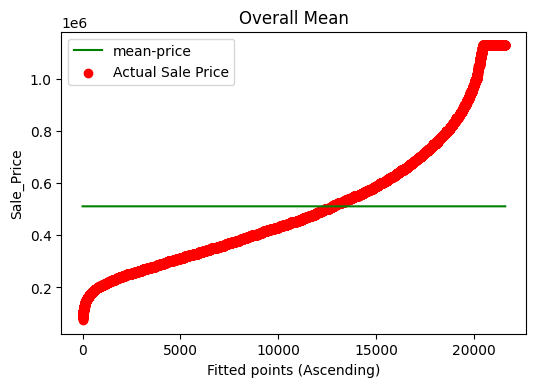

In [79]:
plt.figure(dpi=100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color='red', label = 'Actual Sale Price')
plt.plot(k,data['mean_sales'], color='green', label='mean-price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale_Price')
plt.title("Overall Mean")
plt.legend()

In [80]:
grade_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grade_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [81]:
data['grade_mean'] = 0

for i in grade_mean.columns:
    data['grade_mean'][data['Overall Grade']==i] = grade_mean[i][0]
data['grade_mean'].head()

<ipython-input-81-47115f434e28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i] = grade_mean[i][0]
<ipython-input-81-47115f434e28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i] = grade_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [82]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

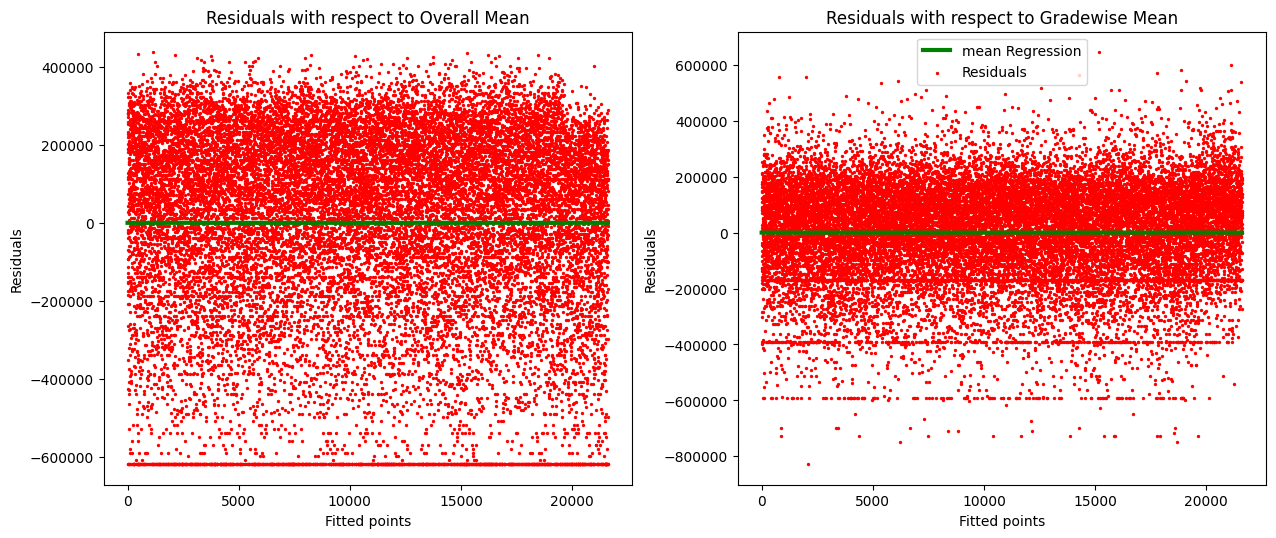

In [83]:
k = range(0,len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize=(15,6), dpi=100)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color='red', label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Gradewise Mean')

plt.legend()

In [84]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [85]:
y = data['Sale_Price']
y_hat1 = data['mean_sales']
y_hat2 = data['grade_mean']
n = len(data)

In [86]:
cost_mean = sum(abs(y_hat1 - y))/n
cost_mean

199168.78146839526

In [87]:
cost_grade_mean = sum(abs(y_hat2 - y))/n
cost_grade_mean

137081.70298203363

In [88]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(y_hat2,y)
cost_grade_mean

137081.7029820291

In [89]:
from sklearn.metrics import mean_squared_error
cost_grade_mean = mean_squared_error(y_hat2,y)
cost_mean = mean_squared_error(y_hat1,y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [90]:
cost_grade_mean = mean_squared_error(y_hat2,y)**0.5
cost_mean = mean_squared_error(y_hat1,y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [91]:
y = data['Sale_Price']
y_bar = data['mean_sales']
y_hat = data['grade_mean']
n = len(data)

In [92]:
mse_mean = mean_squared_error(y_bar,y)
mse_mean

62528116847.799576

In [93]:
mse_model = mean_squared_error(y_hat,y)
mse_model

30804835720.342426

In [94]:
R2 = 1 - (mse_model/mse_mean)
R2

0.5073442592981836

## Linear Regression


In [95]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


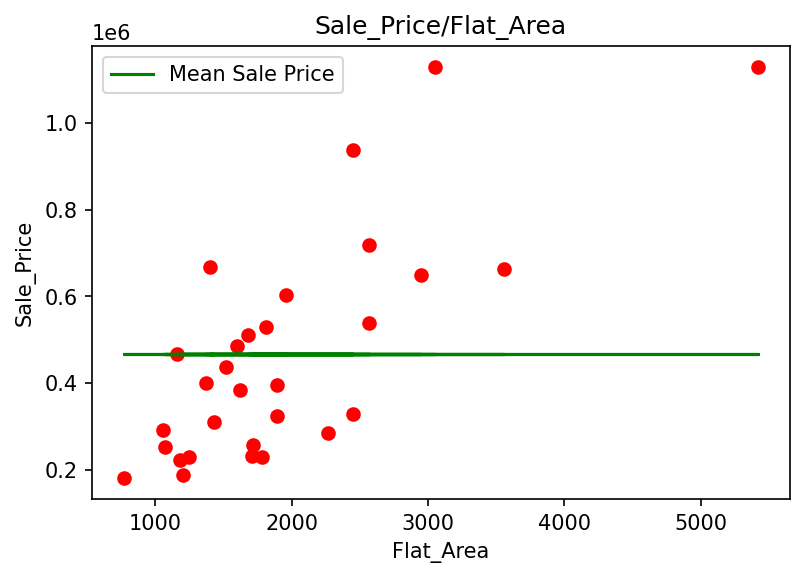

In [96]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color="green",label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

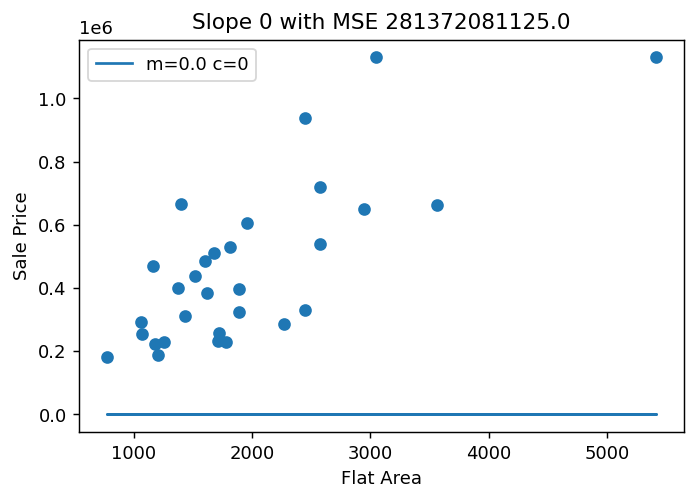

In [97]:
c = 0 
m = 0 
line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area,line, label = 'm=0.0 c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.legend()

MSE = mean_squared_error(sample_data.sale_price, line)
plt.title("Slope " + str(m) + " with MSE " + str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

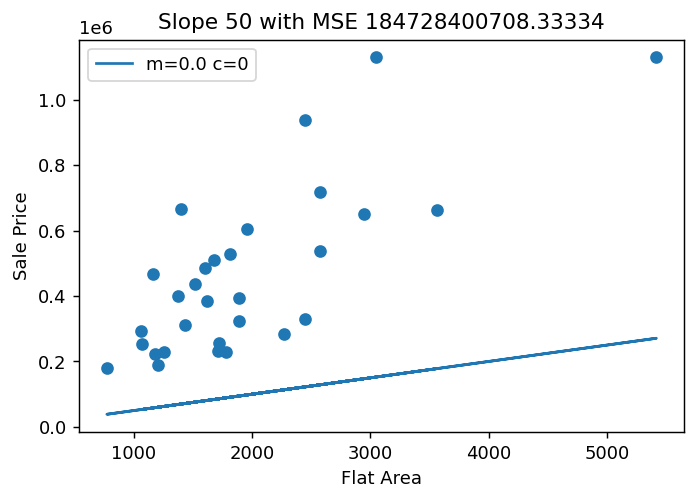

In [98]:
c = 0 
m = 50 
line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area,line, label = 'm=0.0 c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.legend()

MSE = mean_squared_error(sample_data.sale_price, line)
plt.title("Slope " + str(m) + " with MSE " + str(MSE))

In [99]:
def slope_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [100]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope=i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [101]:
Cost_table = pd.DataFrame({'slope': slope, 'Cost': Cost})
Cost_table.head()

,slope,Cost
0,0.0,2.813721e+11
1,0.1,2.811558e+11
2,0.2,2.809395e+11
3,0.3,2.807234e+11
4,0.4,2.805073e+11


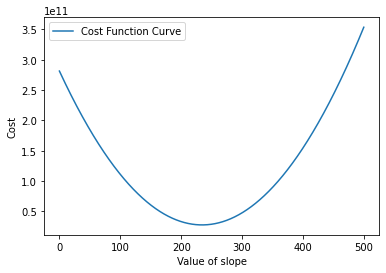

In [102]:
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [103]:
d = Cost_table[Cost_table.Cost == min(Cost_table.Cost)]
d

,slope,Cost
2343,234.3,2.788201e+10


In [104]:
 def intercept_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE
        

In [105]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = slope_Error(slope=234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [106]:
Cost_table = pd.DataFrame({'intercept': intercept, 'Cost': Cost})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


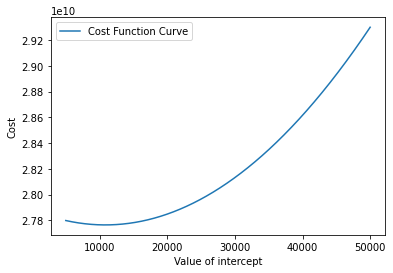

In [107]:
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [108]:
d = Cost_table[Cost_table.Cost == min(Cost_table.Cost)]
d

,intercept,Cost
5834,10834,2.776507e+10


In [109]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope=i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [110]:
Cost_table = pd.DataFrame({'slope': slope, 'Cost': Cost})
Cost_table.head()

,slope,Cost
0,0.0,2.713921e+11
1,0.1,2.711800e+11
2,0.2,2.709680e+11
3,0.3,2.707560e+11
4,0.4,2.705442e+11


In [111]:
d = Cost_table[Cost_table.Cost == min(Cost_table.Cost)]
d

,slope,Cost
2297,229.7,2.768141e+10


In [112]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = slope_Error(slope=229.7, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [113]:
Cost_table = pd.DataFrame({'intercept': intercept, 'Cost': Cost})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


In [114]:
d = Cost_table[Cost_table.Cost == min(Cost_table.Cost)]
d

,intercept,Cost
14199,19199,2.761145e+10


 ## Gradient Descent

In [115]:
# Step 1 : Initialize Parameters
def param_init(Y):
    m=0.1
    c = Y.mean()
    return m,c

In [116]:
# Step 2 : Generate Predictions
def generate_predictions(m,c,X):
    prediction = []
    for x in X:
        pred = (m*x) + c
        prediction.append(pred)
    return prediction

In [117]:
# Step 3 : Calculating Cost
def compute_cost(prediction,Y):
    cost = np.sum(((prediction-Y)**2)/len(Y))
    return cost

In [118]:
# Step 4 : Updating Parameters
def gradients(prediction, Y, X):
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm,Gc

In [119]:
def param_update(m_old , c_old , Gm_old , Gc_old , alpha):
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new , c_new

In [120]:
def result(m , c , X, Y, cost, predictions, i):
    if i< max_iter -1:
        print("Gradient Descent has converged at iteration {}".format(i))
    else:
        print("Result after", max_iter,"iterations is:")
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter(X,Y,color='red',label = 'data points')
    label = 'final regression line: m={}; c={}'.format(str(m),str(c))
    plt.plot(X,predictions, color='green', label=label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()    

After Iteration 0 : m =  0.23163464136333034 ; c =  1.1916393797643346e-16 ; Cost =  0.85836535863667
After Iteration 10 : m =  0.7016365588490323 ; c =  1.6209256159527283e-16 ; Cost =  0.4301677518456903
After Iteration 20 : m =  0.752102630465492 ; c =  1.6690352803531518e-16 ; Cost =  0.42523096955478523
After Iteration 30 : m =  0.7575213836442491 ; c =  1.6764367671839864e-16 ; Cost =  0.42517405233011774
Gradient Descent has converged at iteration 33


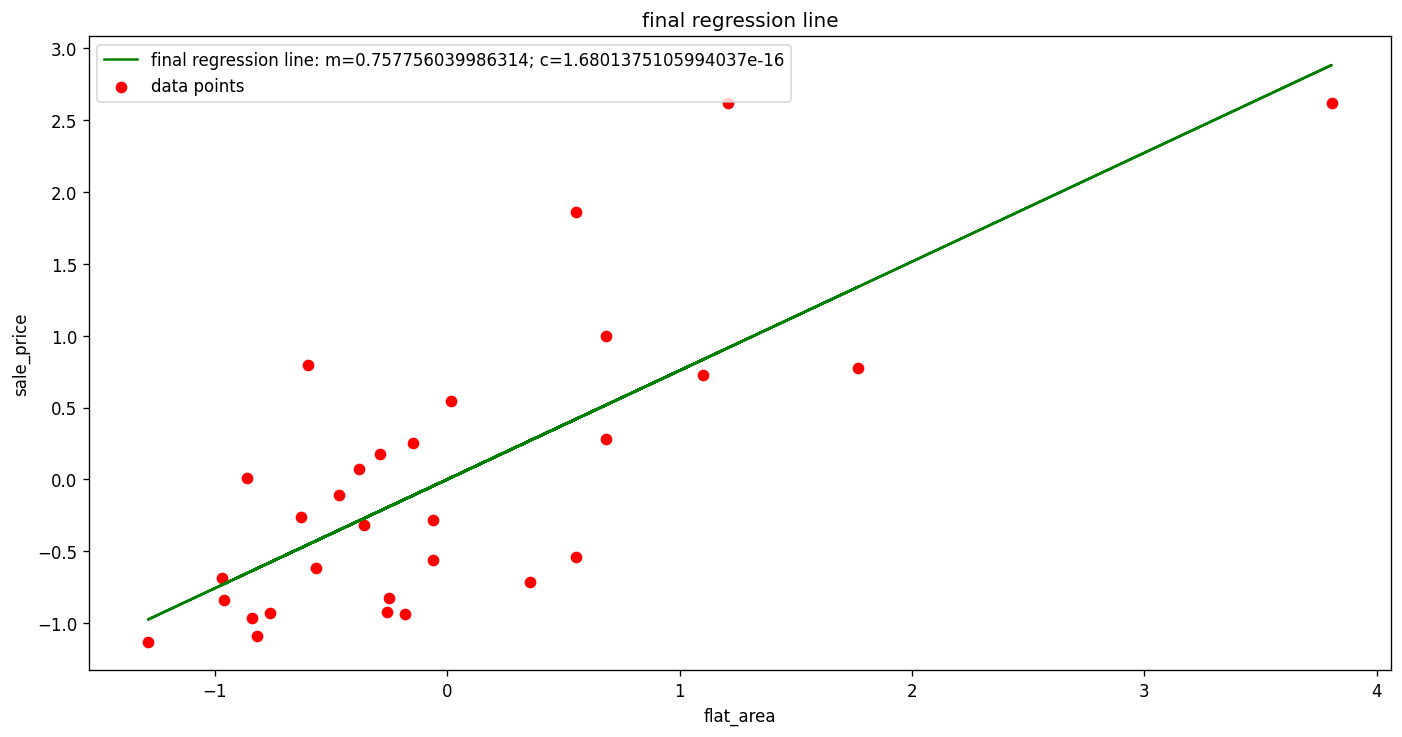

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

max_iter = 1000
cost_old = 0
alpha = 0.1

m,c = param_init(sale_price)

for i in range(0, max_iter):
    predictions = generate_predictions(m , c, flat_area)
    
    cost_new = compute_cost(predictions, sale_price)
    
    if abs(cost_new - cost_old) < 10**(-7):
        break
    
    Gm , Gc = gradients(predictions, sale_price, flat_area)
    
    m ,c = param_update(m , c , Gm , Gc , alpha)
    
    if i%10 == 0:
        print('After Iteration',i,': m = ',m,'; c = ',c,'; Cost = ',cost_new)
    
    cost_old = cost_new
    
result(m, c, flat_area, sale_price, cost_new, predictions, i)
    

In [122]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,3,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


# Scaling the dataset


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = df['Sale_Price']
X = scaler.fit_transform(df.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X, columns= df.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.240418,-0.563993,0.460990,0.245134,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,3.225353,-0.563993,-0.891735,1.397518,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


## Checking and Removing Multicollinearity

In [124]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.046951,0.349223,0.477549,0.303294,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,-0.002280,0.635638,0.685088,0.283798,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.007678,0.705725,0.876226,0.435142,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,-0.025938,0.102314,0.183492,0.015252,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,-0.092188,0.461368,0.524031,-0.245572,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.037401,0.223661,0.167812,0.276974,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Condition_of_the_House,0.046951,-0.002280,0.007678,-0.025938,-0.092188,0.037401,1.000000,-0.041292,-0.060636,0.129535,...,0.012406,-0.017464,0.009942,0.017348,-0.019278,0.014344,0.033440,0.026529,0.014115,-0.004902
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,-0.041292,1.000000,0.705153,0.145232,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,-0.060636,0.705153,1.000000,-0.051825,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.129535,0.145232,-0.051825,1.000000,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775


In [125]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

## Calculating VIF

In [126]:
! pip install statsmodels 

You should consider upgrading via the 'c:\users\shreya\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index= vif_data.columns)
VIF    


No of Bedrooms                                  1.635971
No of Bathrooms                                 3.372043
Flat Area (in Sqft)                          1481.623726
Lot Area (in Sqft)                              2.105888
No of Floors                                    2.106159
No of Times Visited                             1.432192
Condition_of_the_House                          1.079159
Overall Grade                                   2.954144
Area of the House from Basement (in Sqft)    1205.513049
Basement Area (in Sqft)                       345.436003
Age of House (in Years)                         2.456914
Latitude                                        2.446068
Longitude                                       1.670287
Living Area after Renovation (in Sqft)          3.063416
Lot Area after Renovation (in Sqft)             2.143129
Year Since Renovation                           2.777031
Ever_Renovated_Yes                              2.889376
Waterfront_View_Yes            

In [128]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [129]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index= vif_data.columns)
    if vif.max() > 5:
        print(vif[vif==vif.max()].index[0], 'has been removed')
        data = data.drop(columns = [vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data
    
    

In [130]:
for i in range(7):
    vif_data = MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.240418,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,3.225353,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [131]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index= vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                               1.635951
 No of Bathrooms                              3.370872
 Lot Area (in Sqft)                           2.105880
 No of Floors                                 2.106157
 No of Times Visited                          1.432192
 Condition_of_the_House                       1.079145
 Overall Grade                                2.953950
 Area of the House from Basement (in Sqft)    4.579348
 Basement Area (in Sqft)                      1.972103
 Age of House (in Years)                      2.456914
 Latitude                                     2.446067
 Longitude                                    1.670286
 Living Area after Renovation (in Sqft)       3.063360
 Lot Area after Renovation (in Sqft)          2.143129
 Year Since Renovation                        2.777025
 Ever_Renovated_Yes                           2.889369
 Waterfront_View_Yes                          1.208108
 Zipcode_Group_Zipcode_Group_1                1.537697
 Zipcode_G

## Train/Test set

In [132]:
X = vif_data
Y = df['Sale_Price']

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3 ,random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 26), (6483, 26), (15126,), (6483,))

In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [135]:
lr.coef_

array([ -3743.86268966,  12165.27603311,  14972.3794093 ,   2071.81750632,
        27235.6767688 ,  13237.43934672,  59685.66692355,  80576.41744709,
        27967.19198262,  29827.71848552,  20597.24104042, -23662.48333123,
        17908.00959976,  -2756.43668245,  -9630.79296845,  13342.20061693,
        10817.83076131,  12238.12037397,  34019.20063024,  63512.09082372,
        81454.21997801,  51120.35513765,  73635.06082983,  40243.05207423,
        67932.66969867,  22261.60442935])

In [136]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.845733682040142

## Residuals

In [137]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals':residuals,'predictions':predictions})
residual_table = residual_table.sort_values(by='predictions')

In [138]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

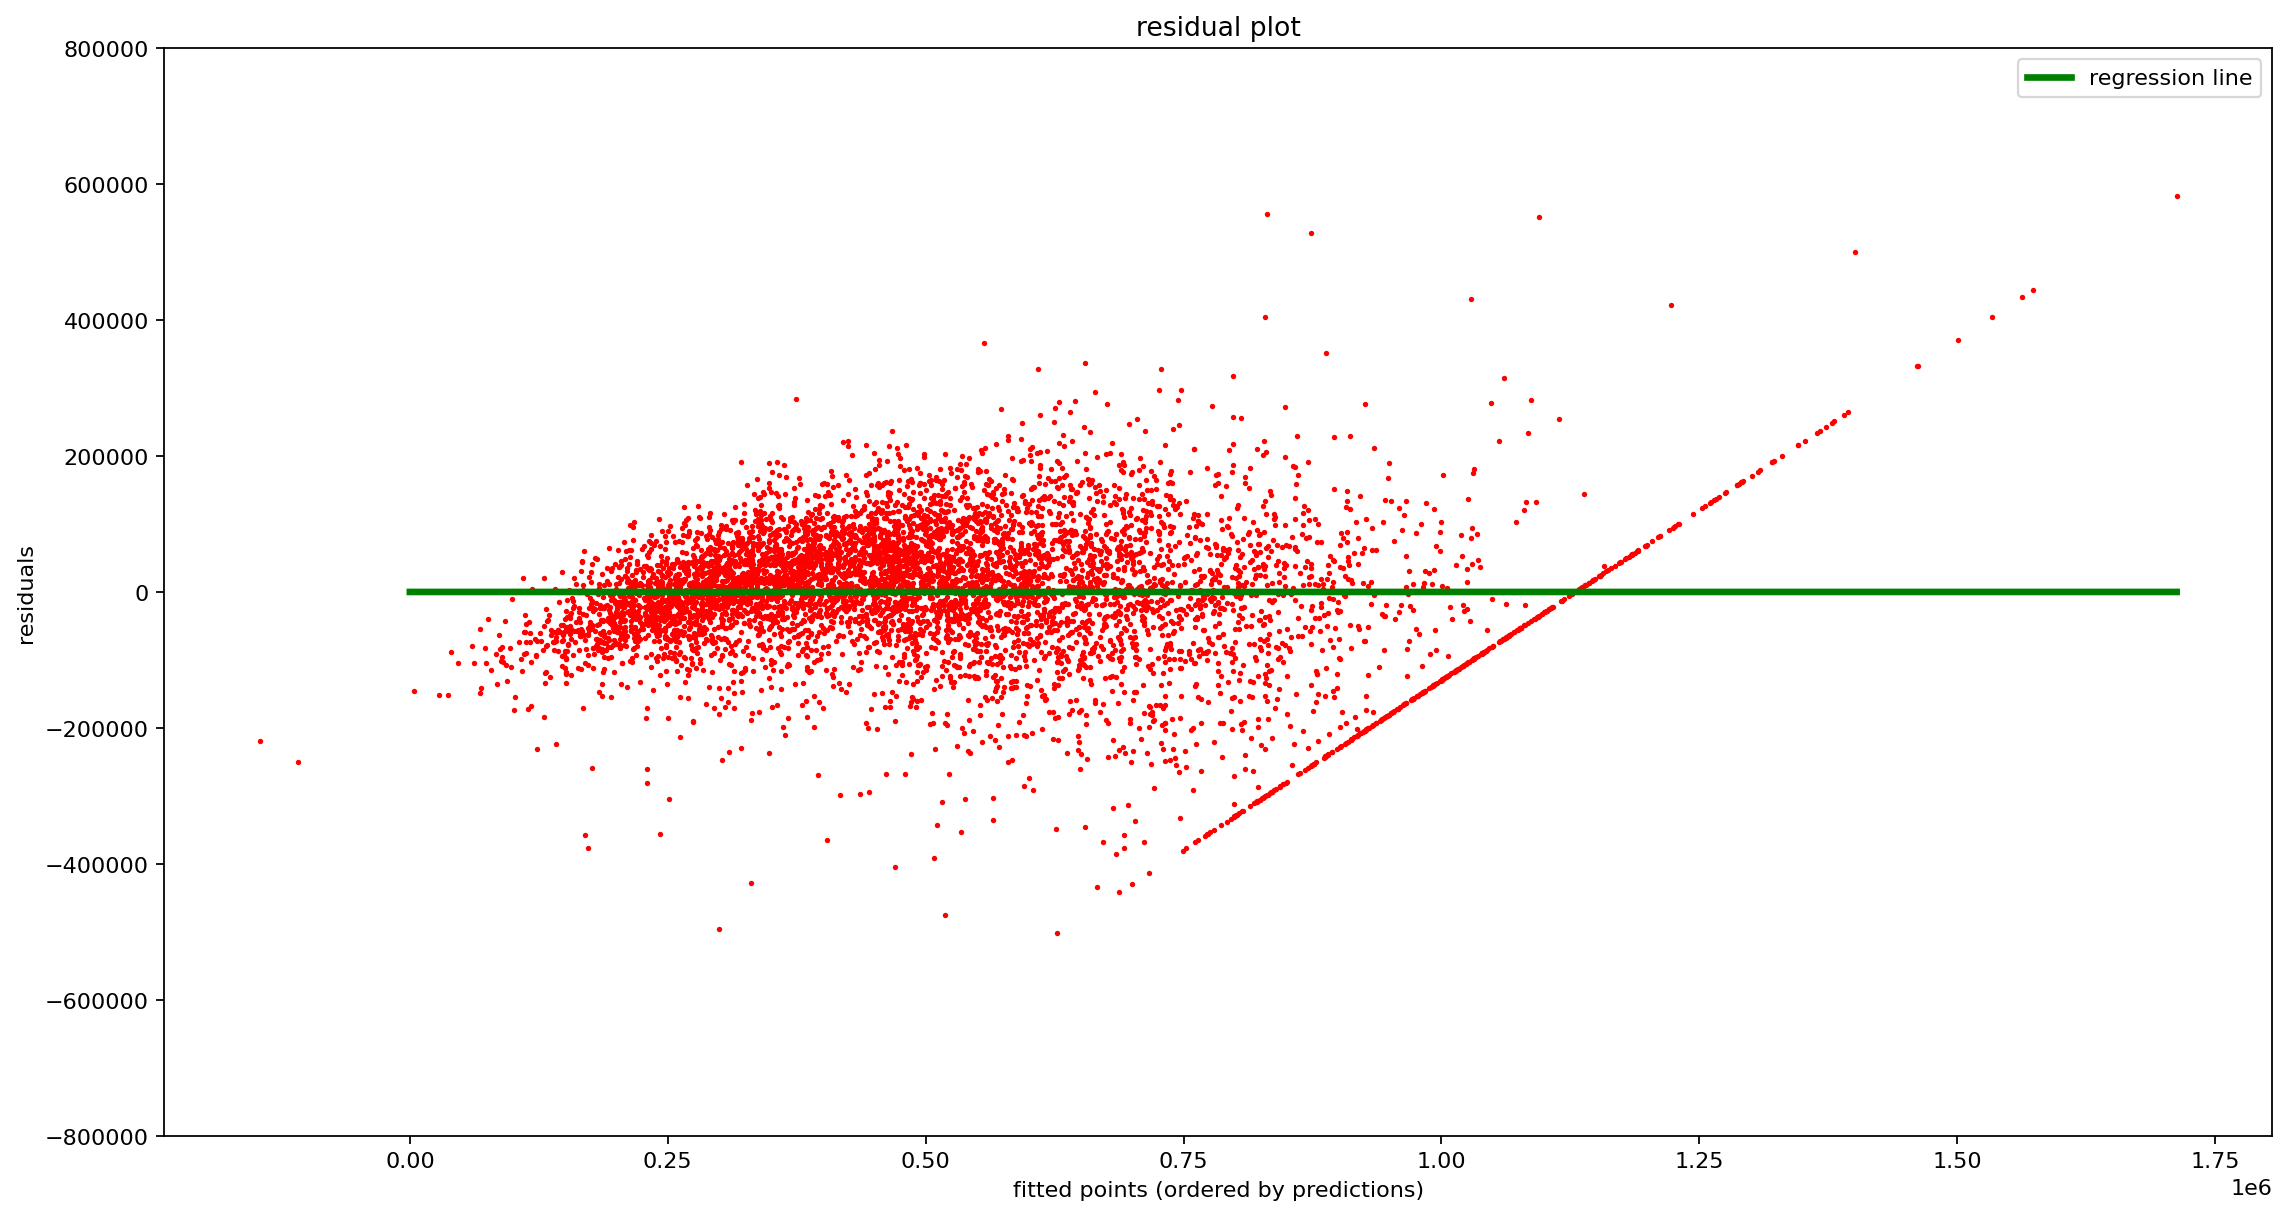

In [139]:
plt.figure(dpi=160, figsize=(17,9))
plt.scatter(residual_table['predictions'], residual_table['residuals'], color='red', s=2)
plt.plot(z,k,color='green',linewidth=3,label='regression line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## Distribution of errors

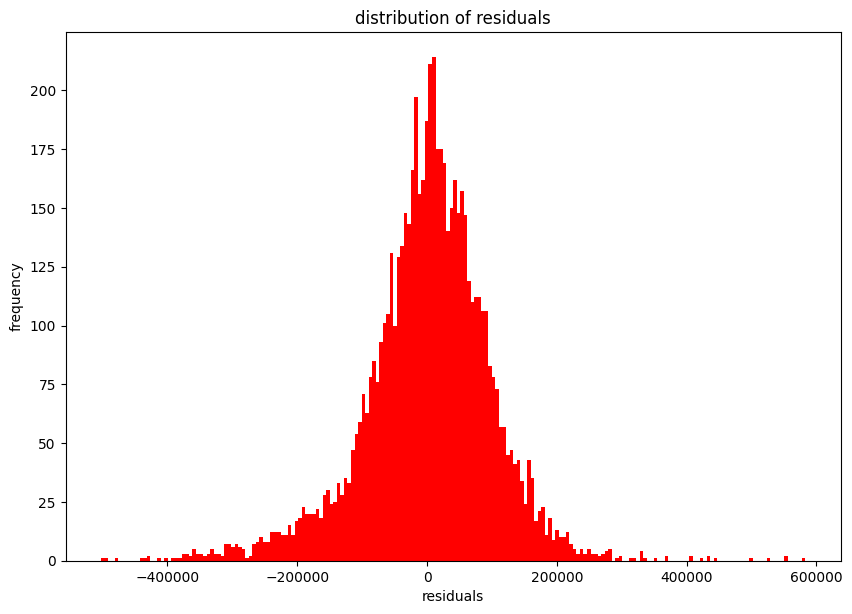

In [140]:
plt.figure(dpi = 100, figsize=(10,7))
plt.hist(residual_table['residuals'], color='red', bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [141]:
coefficients_table = pd.DataFrame({'column':x_train.columns,'coefficients':lr.coef_})
coefficients_table = coefficients_table.sort_values(by='coefficients')

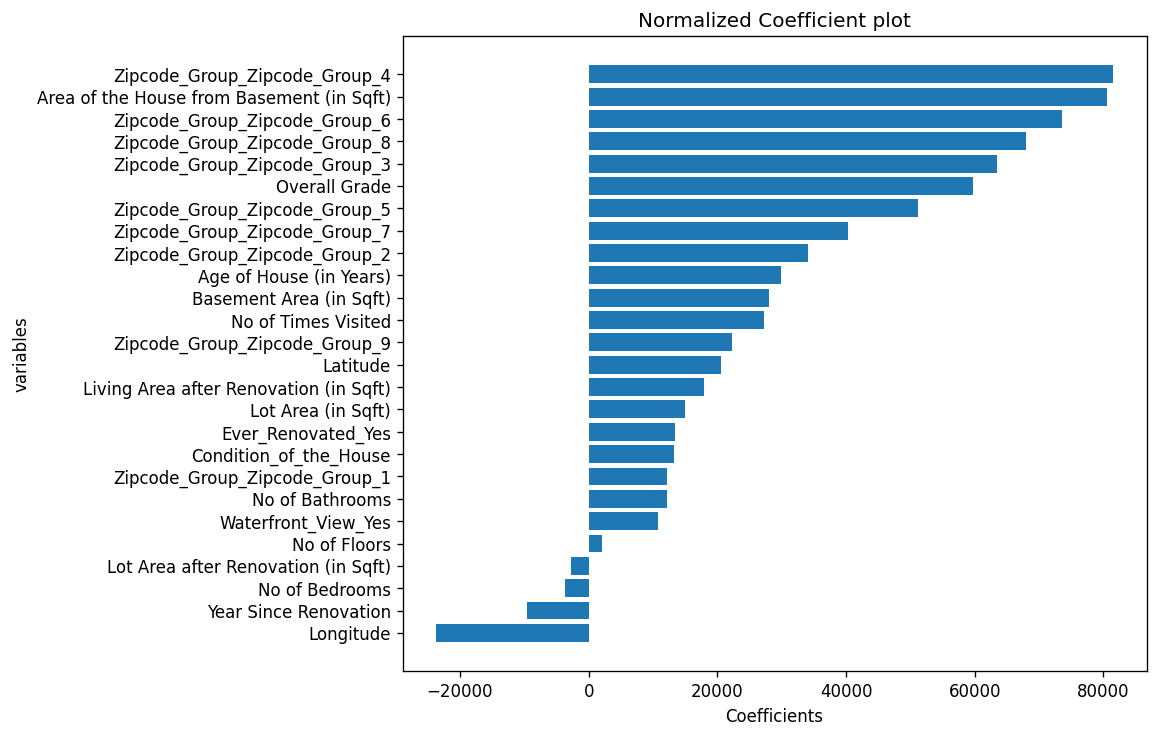

In [142]:
plt.figure(figsize=(8,7), dpi=120)
x = coefficients_table['column']
y = coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficients')
plt.ylabel('variables')
plt.title('Normalized Coefficient plot')
plt.show()